In [76]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("../Data/dataset_dk3619_preprocessed_v1.csv")

### Choose Feauture will use for Model

In [69]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
              'weekday_name', 'quarter', 'month', 'year', 'day_of_year',
              'day_of_month', 'week_of_year', 'season', 'holiday', 'Consumption_MWh']
df_corr = df[columns]
#df_corr = pd.get_dummies(df_corr, columns=['DK3619Code'], prefix=['DK3619Code'])


In [62]:
df_corr.columns

Index(['HourUTC', 'HourDK', 'hour', 'day_of_week', 'weekday_name', 'quarter',
       'month', 'year', 'day_of_year', 'day_of_month', 'week_of_year',
       'season', 'holiday', 'Consumption_MWh'],
      dtype='object')

In [70]:
### Mapping data to numberic 

weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


C:\Users\danny.ha\AppData\Local\Temp\ipykernel_15040\3526925431.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


In [71]:
### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df_corr['season'] = df_corr['season'].map(seasons_mapping)

C:\Users\danny.ha\AppData\Local\Temp\ipykernel_15040\1903303417.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['season'] = df_corr['season'].map(seasons_mapping)


In [65]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

correlation_matrix = df_corr.corr()

print(correlation_matrix)

C:\Users\danny.ha\AppData\Local\Temp\ipykernel_15040\3437476314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
C:\Users\danny.ha\AppData\Local\Temp\ipykernel_15040\3437476314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


                  HourUTC    HourDK      hour  day_of_week  weekday_name  \
HourUTC          1.000000  1.000000  0.000195    -0.000383     -0.000383   
HourDK           1.000000  1.000000  0.000195    -0.000383     -0.000383   
hour             0.000195  0.000195  1.000000     0.000029      0.000029   
day_of_week     -0.000383 -0.000383  0.000029     1.000000      1.000000   
weekday_name    -0.000383 -0.000383  0.000029     1.000000      1.000000   
quarter         -0.041822 -0.041819 -0.000432     0.000593      0.000593   
month           -0.040255 -0.040253 -0.000321     0.001606      0.001606   
year             0.996624  0.996623 -0.000005    -0.000505     -0.000505   
day_of_year     -0.040242 -0.040240 -0.000324     0.001513      0.001513   
day_of_month     0.001890  0.001890 -0.000037    -0.000953     -0.000953   
week_of_year    -0.039615 -0.039613 -0.000325     0.000223      0.000223   
season          -0.015522 -0.015533 -0.000231     0.000037      0.000037   
holiday     

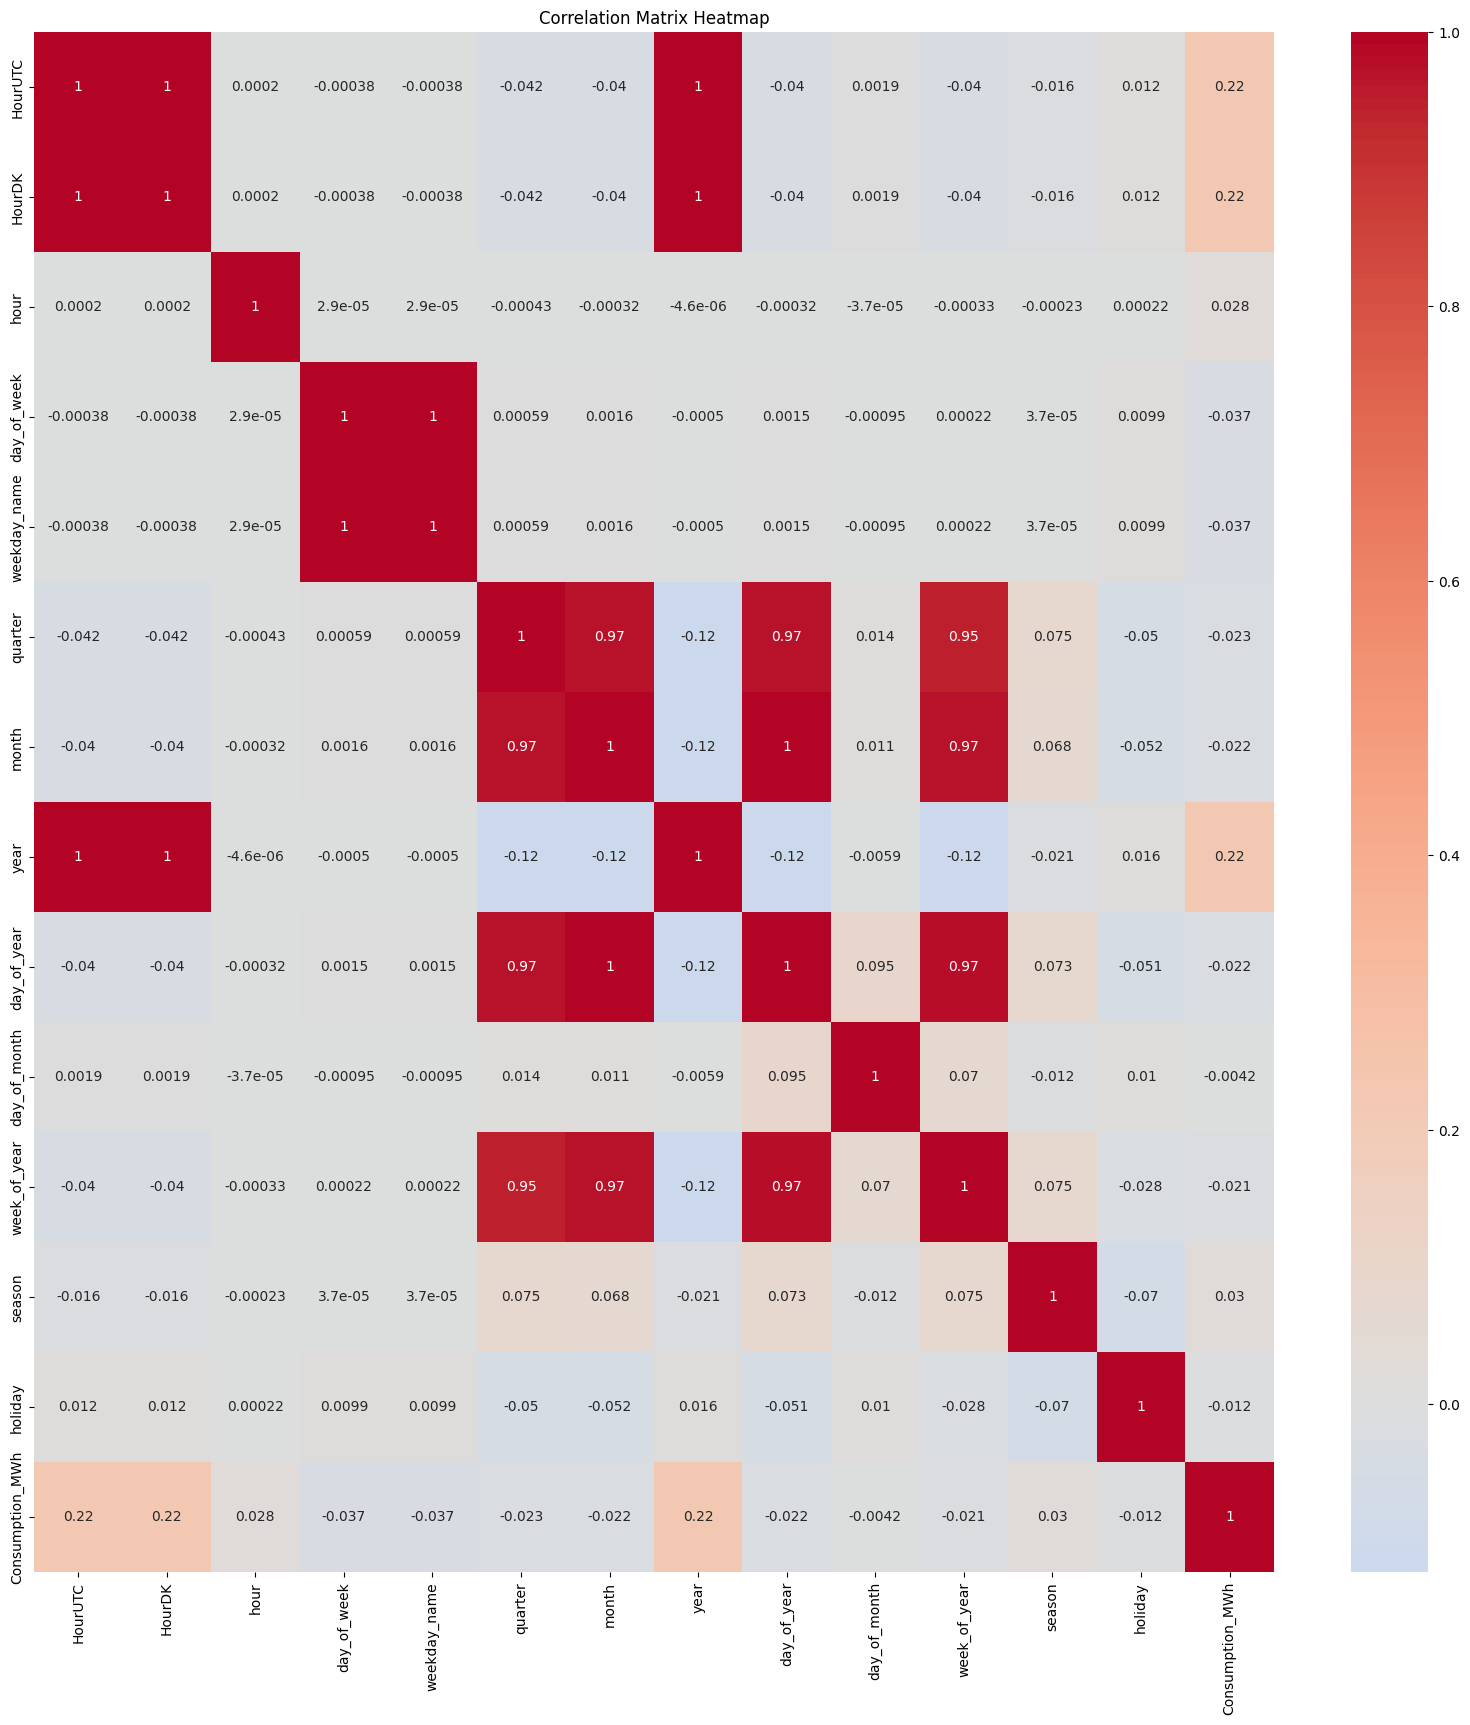

In [30]:
# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Split data

In [72]:
#Split data
y = df_corr[['Consumption_MWh']]  # Target variable
x = df_corr[['season', 'year', 'month', 'day_of_year' , 'hour']]  # Features



# Split the data into training (60%), validation (20%), and test (20%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)

# Further split the temporary data into validation (50%) and test (50%) sets
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### Train data

In [74]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(x_train, y_train)

C:\Users\danny.ha\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

## Predict

In [75]:
y_pred = rf_model.predict(x_test)

In [78]:
y_pred

array([ 67.55957699,  35.57068319,  32.58286841, ...,  68.56406283,
       127.54909276, 103.46540151])

In [77]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 74.7872394378845
Mean Squared Error (MSE): 20434.95416189467
Root Mean Squared Error (RMSE): 142.95088024176232
R-squared (R²): -0.01922838181398223
